# EMPLOYEE ATTRITION ANALYSIS

### PROBLEM STATEMENT
   XYZ company which was established a few years back is facing around a 15% attrition rate for
a couple of years. And it's majorly affecting the company in many aspects. In order to
understand why employees are leaving the company and reduce the attrition rate XYZ
company has approached an HR analytics consultancy for analyzing the data they have. You
are playing the HR analyst role in this project and building a dashboard which can help the
organization in making data-driven decisions.

In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
emp=pd.read_csv(r"C:\Users\nived\OneDrive\Desktop\Attrition data.csv")

In [3]:
emp

,EmployeeID,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,1,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,...,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,2,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Female,...,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,3,32,No,Travel_Frequently,Research & Development,17,4,Other,1,Male,...,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,4,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,Male,...,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,5,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,Male,...,9.0,2,6,0,4,4.0,1.0,3.0,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,4406,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,Female,...,10.0,5,3,0,2,4.0,1.0,3.0,3,3
4406,4407,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,Male,...,10.0,2,3,0,2,4.0,4.0,3.0,2,3
4407,4408,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,Male,...,5.0,4,4,1,2,1.0,3.0,3.0,3,4
4408,4409,42,No,Travel_Rarely,Sales,18,2,Medical,1,Male,...,10.0,2,9,7,8,4.0,1.0,3.0,2,3


In [4]:
emp.head()

,EmployeeID,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,1,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,...,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,2,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Female,...,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,3,32,No,Travel_Frequently,Research & Development,17,4,Other,1,Male,...,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,4,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,Male,...,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,5,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,Male,...,9.0,2,6,0,4,4.0,1.0,3.0,3,3


In [5]:
emp.sample(n=10)

,EmployeeID,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
1436,1437,31,No,Non-Travel,Sales,4,1,Medical,1,Female,...,6.0,2,5,1,4,3.0,3.0,3.0,2,3
2038,2039,38,No,Travel_Rarely,Research & Development,1,3,Medical,1,Female,...,7.0,2,7,5,0,3.0,3.0,4.0,2,3
2997,2998,43,No,Travel_Frequently,Research & Development,7,4,Medical,1,Male,...,9.0,2,8,1,7,3.0,4.0,3.0,3,3
983,984,32,No,Travel_Rarely,Research & Development,6,3,Technical Degree,1,Male,...,10.0,0,4,0,2,4.0,3.0,1.0,2,3
2633,2634,47,No,Non-Travel,Research & Development,21,2,Medical,1,Male,...,14.0,2,13,5,12,3.0,2.0,1.0,2,3
1282,1283,59,No,Travel_Frequently,Research & Development,10,4,Life Sciences,1,Male,...,20.0,4,4,1,3,1.0,3.0,2.0,2,3
1002,1003,32,No,Non-Travel,Research & Development,10,4,Life Sciences,1,Female,...,12.0,2,7,0,7,2.0,2.0,3.0,3,3
3195,3196,20,Yes,Travel_Rarely,Research & Development,1,3,Life Sciences,1,Male,...,1.0,2,1,1,1,4.0,3.0,3.0,2,3
599,600,44,Yes,Travel_Rarely,Human Resources,6,2,Human Resources,1,Male,...,6.0,2,6,0,2,3.0,3.0,3.0,1,3
1773,1774,52,No,Travel_Rarely,Sales,21,5,Technical Degree,1,Male,...,34.0,2,34,1,16,3.0,1.0,4.0,3,3


In [6]:
pd.isnull("emp")

False

In [7]:
emp.isnull().sum()

EmployeeID                  0
Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
JobInvolvement              0
PerformanceRating           0
dtype: int64

In [8]:
emp.dropna(subset=["NumCompaniesWorked"],axis=0,inplace=True)

In [11]:
emp.dropna(subset=["EnvironmentSatisfaction"],axis=0,inplace=True)

In [12]:
emp.dropna(subset=["JobSatisfaction"],axis=0,inplace=True)

In [13]:
emp.dropna(subset=["WorkLifeBalance"],axis=0,inplace=True)

In [64]:
emp.dropna(subset=["totalworkingyears"],axis=0,inplace=True)

In [65]:
emp.isnull().sum()

employeeid                 0
age                        0
attrition                  0
businesstravel             0
department                 0
distancefromhome           0
education                  0
educationfield             0
gender                     0
joblevel                   0
jobrole                    0
maritalstatus              0
monthlyincome              0
numcompaniesworked         0
percentsalaryhike          0
standardhours              0
stockoptionlevel           0
totalworkingyears          0
trainingtimeslastyear      0
yearsatcompany             0
yearssincelastpromotion    0
yearswithcurrmanager       0
environmentsatisfaction    0
jobsatisfaction            0
worklifebalance            0
jobinvolvement             0
performancerating          0
dtype: int64

In [66]:
emp

,employeeid,age,attrition,businesstravel,department,distancefromhome,education,educationfield,gender,joblevel,...,totalworkingyears,trainingtimeslastyear,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager,environmentsatisfaction,jobsatisfaction,worklifebalance,jobinvolvement,performancerating
0,1,51,No,Travel_Rarely,Sales,6,College,Life Sciences,Female,1,...,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,2,31,Yes,Travel_Frequently,Research & Development,10,Below_college,Life Sciences,Female,1,...,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,3,32,No,Travel_Frequently,Research & Development,17,Masters,Other,Male,4,...,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,4,38,No,Non-Travel,Research & Development,2,Doctor,Life Sciences,Male,3,...,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,5,32,No,Travel_Rarely,Research & Development,10,Below_college,Medical,Male,1,...,9.0,2,6,0,4,4.0,1.0,3.0,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4404,4405,29,No,Travel_Rarely,Sales,4,Bachelor,Other,Female,2,...,6.0,2,6,1,5,3.0,4.0,3.0,2,3
4405,4406,42,No,Travel_Rarely,Research & Development,5,Masters,Medical,Female,1,...,10.0,5,3,0,2,4.0,1.0,3.0,3,3
4406,4407,29,No,Travel_Rarely,Research & Development,2,Masters,Medical,Male,1,...,10.0,2,3,0,2,4.0,4.0,3.0,2,3
4407,4408,25,No,Travel_Rarely,Research & Development,25,College,Life Sciences,Male,2,...,5.0,4,4,1,2,1.0,3.0,3.0,3,4


In [67]:
emp.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4404    False
4405    False
4406    False
4407    False
4408    False
Length: 4300, dtype: bool

In [68]:
emp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4300 entries, 0 to 4408
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   employeeid               4300 non-null   int64  
 1   age                      4300 non-null   int64  
 2   attrition                4300 non-null   object 
 3   businesstravel           4300 non-null   object 
 4   department               4300 non-null   object 
 5   distancefromhome         4300 non-null   int64  
 6   education                4300 non-null   object 
 7   educationfield           4300 non-null   object 
 8   gender                   4300 non-null   object 
 9   joblevel                 4300 non-null   int64  
 10  jobrole                  4300 non-null   object 
 11  maritalstatus            4300 non-null   object 
 12  monthlyincome            4300 non-null   int64  
 13  numcompaniesworked       4300 non-null   float64
 14  percentsalaryhike       

In [69]:
emp.describe()

,employeeid,age,distancefromhome,joblevel,monthlyincome,numcompaniesworked,percentsalaryhike,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager,environmentsatisfaction,jobsatisfaction,worklifebalance,jobinvolvement,performancerating
count,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.0,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000
mean,2211.695116,36.926977,9.197907,2.066977,65059.844186,2.690000,15.210698,8.0,0.795349,11.285116,2.796279,7.026047,2.190000,4.132558,2.723953,2.724884,2.761163,2.728837,3.153953
std,1272.117692,9.146517,8.097059,1.106633,47045.398914,2.495764,3.662777,0.0,0.853534,7.790052,1.290142,6.148036,3.230818,3.565831,1.093802,1.101875,0.707800,0.710769,0.360946
min,1.000000,18.000000,1.000000,1.000000,10090.000000,0.000000,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,3.000000
25%,1110.750000,30.000000,2.000000,1.000000,29260.000000,1.000000,12.000000,8.0,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000
50%,2215.500000,36.000000,7.000000,2.000000,49360.000000,2.000000,14.000000,8.0,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,3314.250000,43.000000,14.000000,3.000000,83802.500000,4.000000,18.000000,8.0,1.000000,15.000000,3.000000,9.250000,3.000000,7.000000,4.000000,4.000000,3.000000,3.000000,3.000000
max,4409.000000,60.000000,29.000000,5.000000,199990.000000,9.000000,25.000000,8.0,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000,4.000000,4.000000,4.000000,4.000000,4.000000


In [70]:
emp.describe().T

,count,mean,std,min,25%,50%,75%,max
employeeid,4300.0,2211.695116,1272.117692,1.0,1110.75,2215.5,3314.25,4409.0
age,4300.0,36.926977,9.146517,18.0,30.00,36.0,43.00,60.0
distancefromhome,4300.0,9.197907,8.097059,1.0,2.00,7.0,14.00,29.0
joblevel,4300.0,2.066977,1.106633,1.0,1.00,2.0,3.00,5.0
monthlyincome,4300.0,65059.844186,47045.398914,10090.0,29260.00,49360.0,83802.50,199990.0
numcompaniesworked,4300.0,2.690000,2.495764,0.0,1.00,2.0,4.00,9.0
percentsalaryhike,4300.0,15.210698,3.662777,11.0,12.00,14.0,18.00,25.0
standardhours,4300.0,8.000000,0.000000,8.0,8.00,8.0,8.00,8.0
stockoptionlevel,4300.0,0.795349,0.853534,0.0,0.00,1.0,1.00,3.0
totalworkingyears,4300.0,11.285116,7.790052,0.0,6.00,10.0,15.00,40.0


In [26]:
emp

,EmployeeID,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,1,51,No,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,...,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,2,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,...,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,3,32,No,Travel_Frequently,Research & Development,17,4,Other,Male,4,...,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,4,38,No,Non-Travel,Research & Development,2,5,Life Sciences,Male,3,...,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,5,32,No,Travel_Rarely,Research & Development,10,1,Medical,Male,1,...,9.0,2,6,0,4,4.0,1.0,3.0,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4404,4405,29,No,Travel_Rarely,Sales,4,3,Other,Female,2,...,6.0,2,6,1,5,3.0,4.0,3.0,2,3
4405,4406,42,No,Travel_Rarely,Research & Development,5,4,Medical,Female,1,...,10.0,5,3,0,2,4.0,1.0,3.0,3,3
4406,4407,29,No,Travel_Rarely,Research & Development,2,4,Medical,Male,1,...,10.0,2,3,0,2,4.0,4.0,3.0,2,3
4407,4408,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,Male,2,...,5.0,4,4,1,2,1.0,3.0,3.0,3,4


In [27]:
#change to categorical values
emp.replace({'Education':{1:'Below_college', 2:'College', 3:'Bachelor', 4:'Masters', 5:'Doctor'}}, inplace=True)

In [28]:
# convert column names to lower case
lcase_col=[]
for i in emp.columns:
    i=i.lower()
    lcase_col.append(i)
emp.columns=lcase_col

In [29]:
emp.columns

Index(['employeeid', 'age', 'attrition', 'businesstravel', 'department',
       'distancefromhome', 'education', 'educationfield', 'gender', 'joblevel',
       'jobrole', 'maritalstatus', 'monthlyincome', 'numcompaniesworked',
       'percentsalaryhike', 'standardhours', 'stockoptionlevel',
       'totalworkingyears', 'trainingtimeslastyear', 'yearsatcompany',
       'yearssincelastpromotion', 'yearswithcurrmanager',
       'environmentsatisfaction', 'jobsatisfaction', 'worklifebalance',
       'jobinvolvement', 'performancerating'],
      dtype='object')

In [30]:
emp.to_csv('./Clean_nodummy.csv')

In [31]:
df_dum=pd.get_dummies(emp)

In [32]:
print(emp.shape)
print(df_dum.shape)

(4308, 27)
(4308, 52)


In [33]:
df_dum.columns

Index(['employeeid', 'age', 'distancefromhome', 'joblevel', 'monthlyincome',
       'numcompaniesworked', 'percentsalaryhike', 'standardhours',
       'stockoptionlevel', 'totalworkingyears', 'trainingtimeslastyear',
       'yearsatcompany', 'yearssincelastpromotion', 'yearswithcurrmanager',
       'environmentsatisfaction', 'jobsatisfaction', 'worklifebalance',
       'jobinvolvement', 'performancerating', 'attrition_No', 'attrition_Yes',
       'businesstravel_Non-Travel', 'businesstravel_Travel_Frequently',
       'businesstravel_Travel_Rarely', 'department_Human Resources',
       'department_Research & Development', 'department_Sales',
       'education_Bachelor', 'education_Below_college', 'education_College',
       'education_Doctor', 'education_Masters',
       'educationfield_Human Resources', 'educationfield_Life Sciences',
       'educationfield_Marketing', 'educationfield_Medical',
       'educationfield_Other', 'educationfield_Technical Degree',
       'gender_Female', 'g

In [35]:
df_dum.drop(['gender_Female','attrition_No'],axis=1,inplace=True)

In [36]:
# convert column names to lower case
lcase_col=[]
for i in df_dum.columns:
    i=i.lower()
    lcase_col.append(i)
df_dum.columns=lcase_col

In [37]:
df_dum.columns

Index(['employeeid', 'age', 'distancefromhome', 'joblevel', 'monthlyincome',
       'numcompaniesworked', 'percentsalaryhike', 'standardhours',
       'stockoptionlevel', 'totalworkingyears', 'trainingtimeslastyear',
       'yearsatcompany', 'yearssincelastpromotion', 'yearswithcurrmanager',
       'environmentsatisfaction', 'jobsatisfaction', 'worklifebalance',
       'jobinvolvement', 'performancerating', 'attrition_yes',
       'businesstravel_non-travel', 'businesstravel_travel_frequently',
       'businesstravel_travel_rarely', 'department_human resources',
       'department_research & development', 'department_sales',
       'education_bachelor', 'education_below_college', 'education_college',
       'education_doctor', 'education_masters',
       'educationfield_human resources', 'educationfield_life sciences',
       'educationfield_marketing', 'educationfield_medical',
       'educationfield_other', 'educationfield_technical degree',
       'gender_male', 'jobrole_healthcare 

In [38]:
df_dum.to_csv('./IBM_dummied.csv')

### EDA

In [39]:
#using undummied file
df=pd.read_csv('./Clean_nodummy.csv')

In [40]:
df.attrition.head()

0     No
1    Yes
2     No
3     No
4     No
Name: attrition, dtype: object

In [41]:
# have to convert yes to 1 and no to 0
df.loc[df.attrition == 'Yes','attrition']=1
df.loc[df.attrition == 'No','attrition']=0

In [42]:
df.attrition.head()

0    0
1    1
2    0
3    0
4    0
Name: attrition, dtype: object

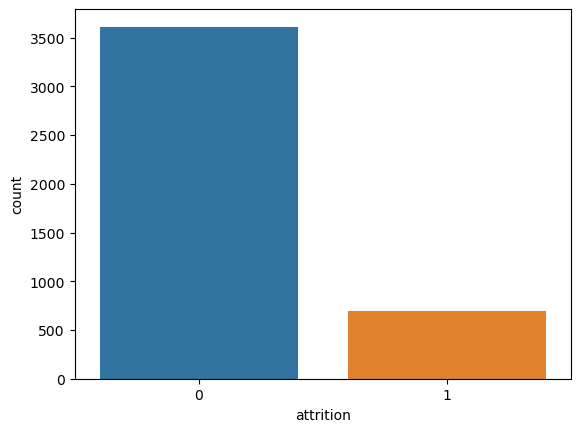

In [43]:

#countplot on attrition
sns.countplot(x='attrition',data=df)
plt.show()

In [44]:
# percentage breakdown of attrition
round(df.attrition.value_counts(normalize=True)*100,2)

0    83.82
1    16.18
Name: attrition, dtype: float64

C:\Users\nived\AppData\Local\Temp\ipykernel_22228\3548754802.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.age,kde=False,bins=30)


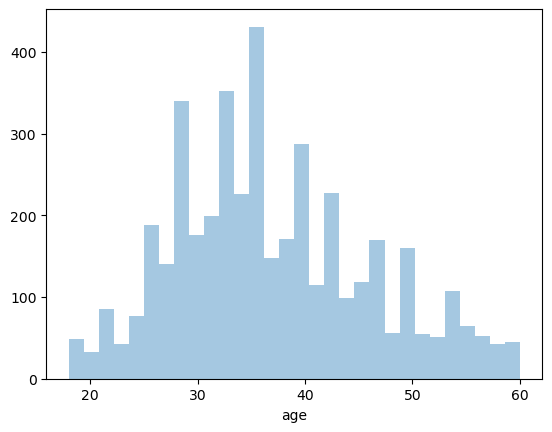

In [45]:
# distribution of age
sns.distplot(df.age,kde=False,bins=30)
plt.show()

C:\Users\nived\AppData\Local\Temp\ipykernel_22228\1800338.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig=sns.distplot(df[df['attrition']==0]['age'],label='Non Attrition',bins=10,kde=0)
C:\Users\nived\AppData\Local\Temp\ipykernel_22228\1800338.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df

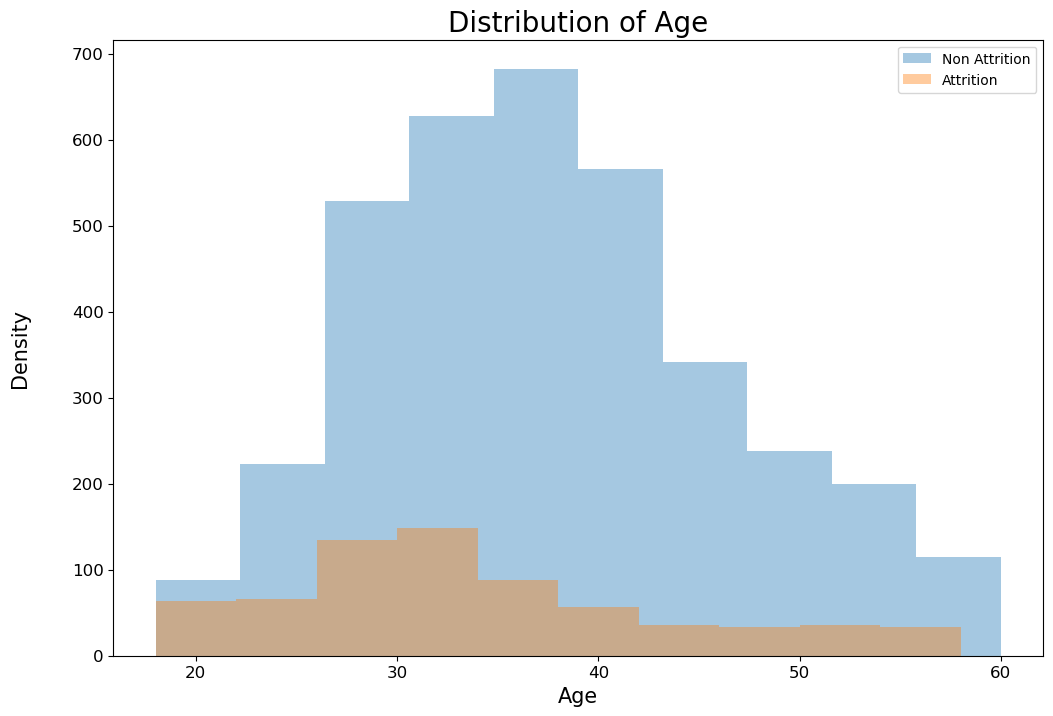

In [46]:
# distribution of age where attrition is true and false
plt.figure(figsize=(12,8))

fig=sns.distplot(df[df['attrition']==0]['age'],label='Non Attrition',bins=10,kde=0)
sns.distplot(df[df['attrition']==1]['age'],label='Attrition',bins=10,kde=0)
#sns.despine(left=1)

plt.xlabel('Age',fontsize=15)
plt.ylabel('Density',fontsize=15)
fig.yaxis.labelpad=30
plt.title('Distribution of Age',fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
fig.yaxis.labelpad=30

plt.legend()
plt.show()

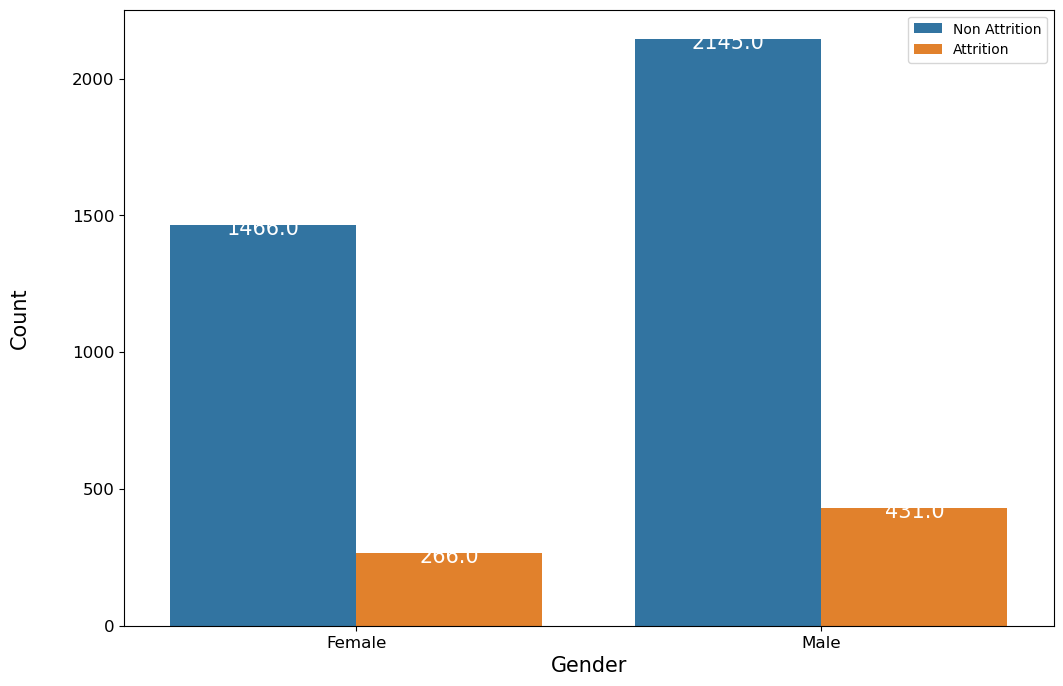

In [47]:
# gender
plt.figure(figsize=(12,8))
fig= sns.countplot(x='gender',hue='attrition',data=df)

fig.set_xlabel('Gender', fontsize=15)
plt.xticks(fontsize=12)
fig.set_ylabel('Count', fontsize=15)
fig.yaxis.labelpad = 30
plt.yticks(fontsize=12)

for p in fig.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    fig.annotate('{:}'.format(p.get_height()), (x.mean(), y-50), ha='center', va='bottom', fontsize=15, color='white')

plt.legend(labels =['Non Attrition','Attrition'])
plt.show()

In [48]:
# female attrition percentage & count
print("percentage")
print(round(df[df.gender=='Female'].attrition.value_counts(normalize=True)*100,2))
print("count")
print(df[df.gender=='Female'].attrition.value_counts())

percentage
0    84.64
1    15.36
Name: attrition, dtype: float64
count
0    1466
1     266
Name: attrition, dtype: int64


In [49]:
# male attrition percentage & count
print("percentage")
print(round(df[df.gender=='Male'].attrition.value_counts(normalize=True)*100,2))
print("count")
print(df[df.gender=='Male'].attrition.value_counts())

percentage
0    83.27
1    16.73
Name: attrition, dtype: float64
count
0    2145
1     431
Name: attrition, dtype: int64


C:\Users\nived\AppData\Local\Temp\ipykernel_22228\808331260.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig=sns.distplot(df[df['attrition']==0]['monthlyincome'],label="Non Attrition",kde=0,bins=10)
C:\Users\nived\AppData\Local\Temp\ipykernel_22228\808331260.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.

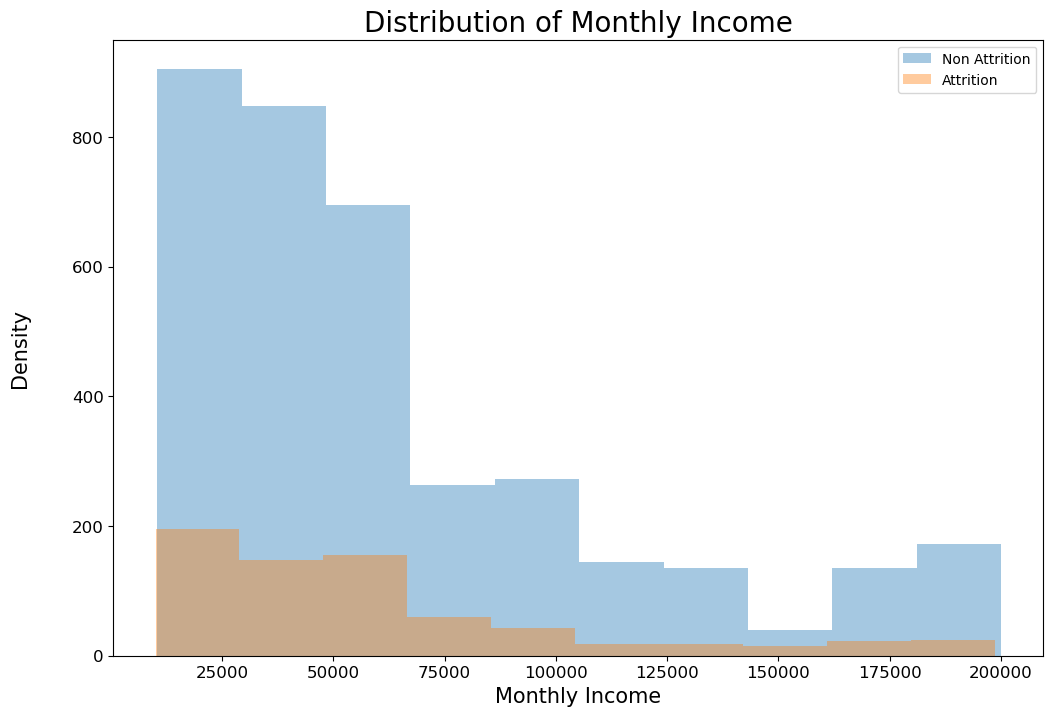

In [50]:
# distribution of monthly income
plt.figure(figsize=(12,8))
fig=sns.distplot(df[df['attrition']==0]['monthlyincome'],label="Non Attrition",kde=0,bins=10)
sns.distplot(df[df['attrition']==1]['monthlyincome'],label="Attrition",kde=0,bins=10)

fig.set_xlabel('Monthly Income', fontsize=15)
plt.xticks(fontsize=12)
fig.yaxis.labelpad = 30
fig.set_ylabel('Density', fontsize=15)
fig.yaxis.labelpad = 30
plt.yticks(fontsize=12)
plt.title('Distribution of Monthly Income',fontsize=20);
fig.yaxis.labelpad = 30

plt.legend()
plt.show()

In [51]:
print("Average Monthly Income: ", df.monthlyincome.mean())
print("Average Monthly Income of Men: ",df[df['gender']=='Male']['monthlyincome'].mean())
print("Average Monthly Income of Women: ",df[df['gender']=='Female']['monthlyincome'].mean())

Average Monthly Income:  65062.45125348189
Average Monthly Income of Men:  65341.739130434784
Average Monthly Income of Women:  64647.066974595844


In [52]:
# income for different job roles
income=df.groupby(by='jobrole').mean().monthlyincome
inc=pd.DataFrame(income)
inc=inc.sort_values(by='monthlyincome')

C:\Users\nived\AppData\Local\Temp\ipykernel_22228\2951173045.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  income=df.groupby(by='jobrole').mean().monthlyincome


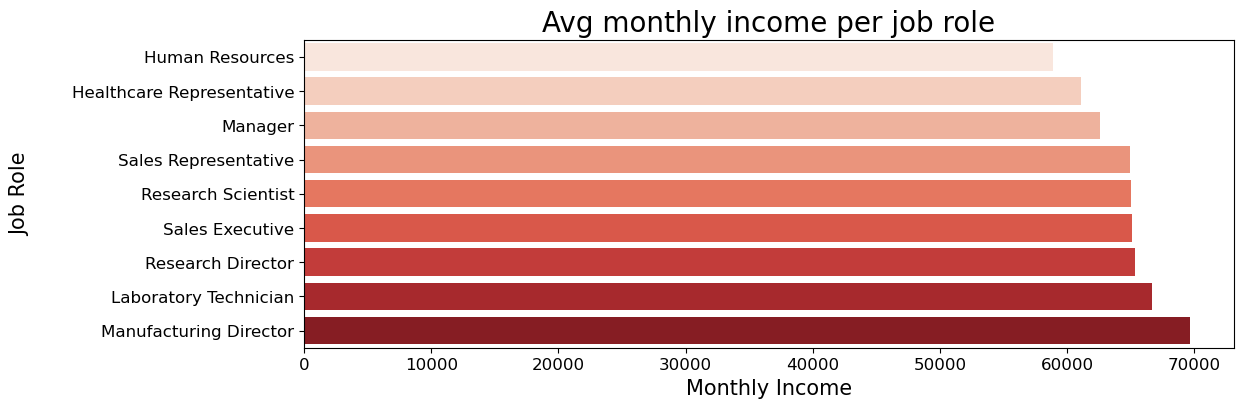

In [53]:
plt.figure(figsize=(12,4))
fig=sns.barplot(x='monthlyincome',y=inc.index,data=inc,palette=sns.color_palette("Reds", n_colors=len(inc.index)))

fig.set_xlabel('Monthly Income', fontsize=15)
plt.xticks(fontsize=12)
fig.yaxis.labelpad = 30
fig.set_ylabel('Job Role', fontsize=15)
fig.yaxis.labelpad = 30
plt.yticks(fontsize=12)
plt.title('Avg monthly income per job role',fontsize=20);
fig.yaxis.labelpad = 30

plt.show()

In [54]:
# attrition for different job roles
job_atr = df[df['attrition'] == 1]['jobrole']
job_atr_val = job_atr.value_counts()
job_atr_df = pd.DataFrame(job_atr_val)

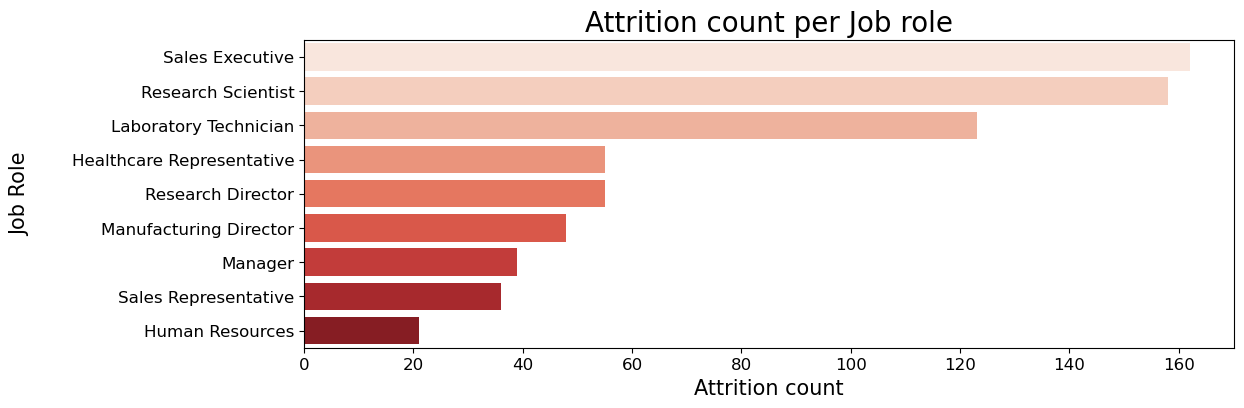

In [55]:
plt.figure(figsize=(12,4))
fig=sns.barplot(x='jobrole',y=job_atr_df.index,data=job_atr_df,palette=sns.color_palette("Reds", n_colors=len(job_atr_df.index)))

fig.set_xlabel('Attrition count', fontsize=15)
plt.xticks(fontsize=12)
fig.yaxis.labelpad = 30
fig.set_ylabel('Job Role', fontsize=15)
fig.yaxis.labelpad = 30
plt.yticks(fontsize=12)
plt.title('Attrition count per Job role',fontsize=20);
fig.yaxis.labelpad = 30

plt.show()

highest paid jobs averaging the lowest attrition and vice versa. But Sales executive goes against it

In [56]:
# education level
edu_sal = df.groupby('education').mean().monthlyincome
edu_sal_df=pd.DataFrame(edu_sal)
edu_sal_df = edu_sal_df.sort_values('monthlyincome', ascending=False)

C:\Users\nived\AppData\Local\Temp\ipykernel_22228\4062941506.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  edu_sal = df.groupby('education').mean().monthlyincome


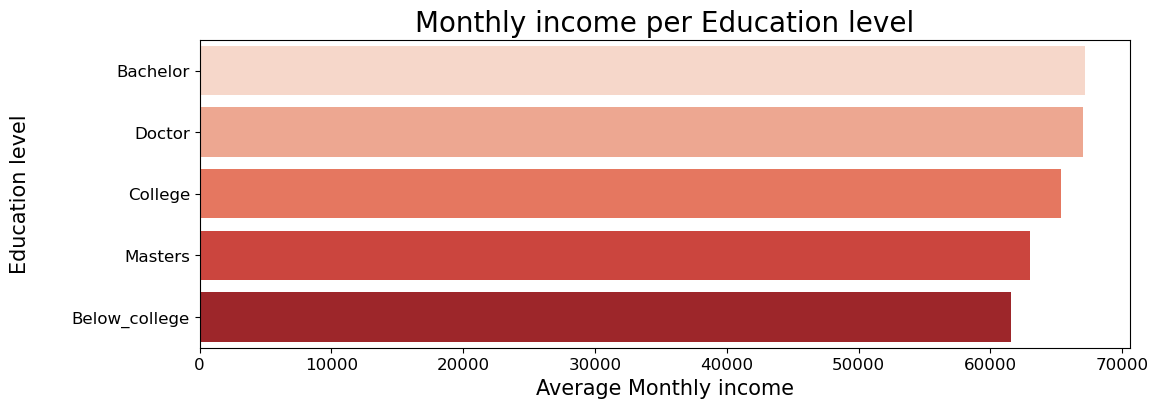

In [57]:
plt.figure(figsize=(12,4))
fig=sns.barplot(x='monthlyincome',y=edu_sal_df.index,data=edu_sal_df,palette=sns.color_palette("Reds", n_colors=len(edu_sal_df.index)))

fig.set_xlabel('Average Monthly income', fontsize=15)
plt.xticks(fontsize=12)
fig.yaxis.labelpad = 30
fig.set_ylabel('Education level', fontsize=15)
fig.yaxis.labelpad = 30
plt.yticks(fontsize=12)
plt.title('Monthly income per Education level',fontsize=20);
fig.yaxis.labelpad = 30

plt.show()